# Movie Recommendation System - Feature Engineering

In these we are reading the dataset in which the data of movie is availabe till 2017. Hence this is the 1st phase of data prpcessing, we will extract the data of movie for the year 2018, 2019 and 2020 in the further phases.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading the dataset
data = pd.read_csv('dataset/movies_metadata.csv')
data.head()

/home/mehul/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
data.shape

(45466, 24)

In [4]:
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [5]:
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

In [6]:
data['year'] = data['release_date'].dt.year

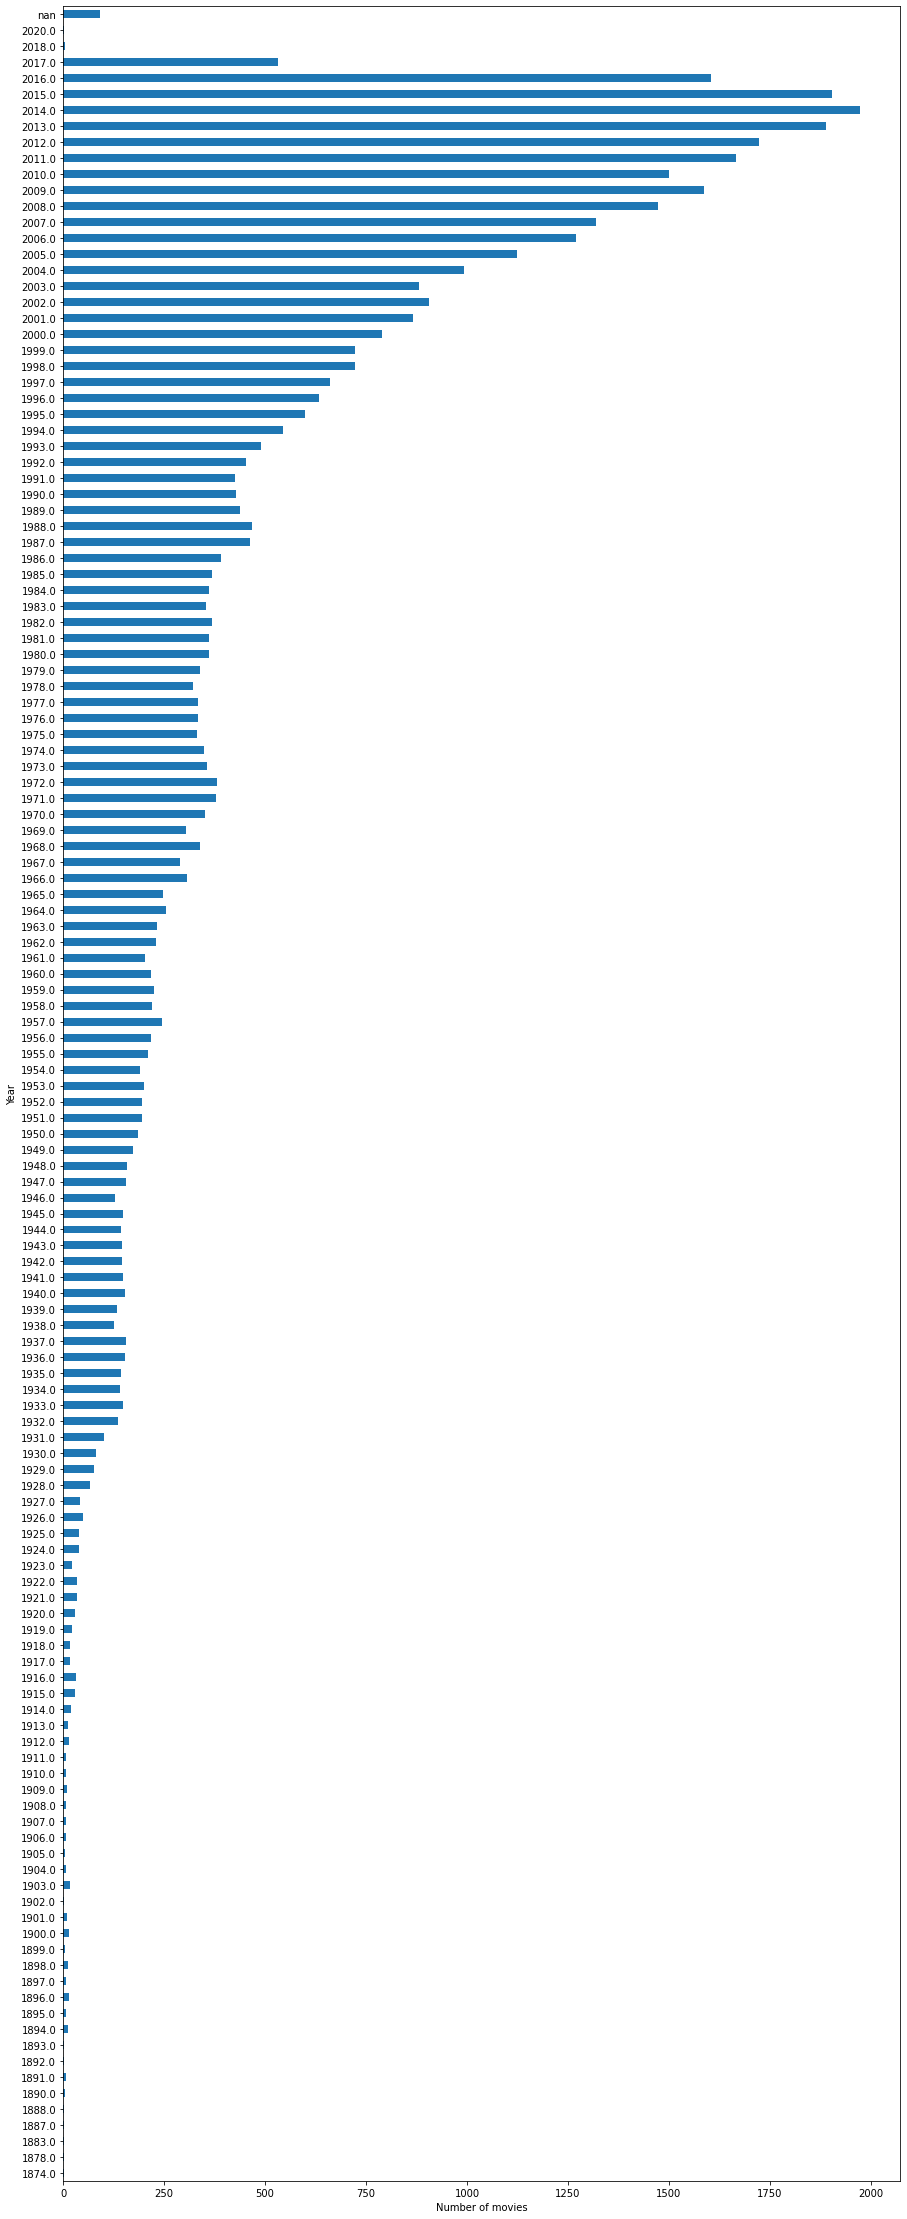

In [7]:
data.year.value_counts(dropna=False).sort_index().plot(kind='barh', figsize=(15,40))
plt.xlabel('Number of movies')
plt.ylabel('Year')
plt.show()

In [8]:
# Getting only 2017 movies as we already have movies up to the year 2016 in data-preprocessing-1. 
new_data = data.loc[data.year == 2017,['genres','id','title','year']]

In [9]:
new_data.head()

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0


In [10]:
#Reading the credits.csv dataset
cred = pd.read_csv('dataset/credits.csv')
cred.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [11]:
new_data['id']= new_data['id'].astype(int)

In [12]:
df = pd.merge(new_data, cred, on='id')

In [13]:
df.head()

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de..."


In [14]:
# evaluates an expression node or a string containing a Python literal or container display
import ast
df['genres'] = df['genres'].map(lambda x: ast.literal_eval(x))
df['cast'] = df['cast'].map(lambda x: ast.literal_eval(x))
df['crew'] = df['crew'].map(lambda x: ast.literal_eval(x))

In [15]:
def genre_list(x):
    genre=[]
    str = ' '
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi= 'Sci-Fi'
            genre.append(scifi)
        else:
            genre.append(i.get('name'))
    if genre == []:
        return np.NaN
    else:
        return (str.join(genre))

In [16]:
df['genres'] = df['genres'].apply(genre_list)

In [17]:
df['genres']

0                    Adventure Action Fantasy Comedy
1                    Action Adventure Fantasy Sci-Fi
2                    Action Adventure Fantasy Sci-Fi
3                     Action Adventure Comedy Sci-Fi
4                           Fantasy Action Adventure
5                                 Thriller Adventure
6                                       Drama Comedy
7                              Action Fantasy Sci-Fi
8                                             Comedy
9                           Action Adventure Fantasy
10          Animation Adventure Comedy Action Family
11                             Drama Thriller Sci-Fi
12                                            Comedy
13                                               NaN
14                                            Horror
15                                             Drama
16                                     Comedy Horror
17                                 TV Movie Thriller
18                                            

In [18]:
def actor1_name(x):
    cast= []
    for i in x:
        cast.append(i.get('name'))
    if cast == [] or len(cast)<=1:
        return np.NaN
    else:
        return (cast[0])

In [19]:
df['actor_1_name'] = df['cast'].apply(actor1_name)

In [20]:
def actor2_name(x):
    cast= []
    for i in x:
        cast.append(i.get('name'))
    if cast == [] or len(cast)<=1:
        return np.NaN
    else:
        return (cast[1])

In [21]:
df['actor_2_name'] = df['cast'].apply(actor2_name)

In [22]:
def actor3_name(x):
    cast= []
    for i in x:
        cast.append(i.get('name'))
    if cast == [] or len(cast)<=2:
        return np.NaN
    else:
        return (cast[2])

In [23]:
df['actor_3_name'] = df['cast'].apply(actor3_name)

In [24]:
def directors(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.NaN
    else:
        return (st.join(dt))

In [25]:
df['director_name'] = df['crew'].apply(directors)

In [26]:
df

,genres,id,title,year,cast,crew,actor_1_name,actor_2_name,actor_3_name,director_name
0,Adventure Action Fantasy Comedy,166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de...",Johnny Depp,Javier Bardem,Geoffrey Rush,Joachim Rønning Espen Sandberg
1,Action Adventure Fantasy Sci-Fi,141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de...",Ben Affleck,Henry Cavill,Gal Gadot,Zack Snyder
2,Action Adventure Fantasy Sci-Fi,284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de...",Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Taika Waititi
3,Action Adventure Comedy Sci-Fi,283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de...",Chris Pratt,Zoe Saldana,Dave Bautista,James Gunn
4,Fantasy Action Adventure,245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de...",Pierce Brosnan,William Hurt,Benjamin Walker,Sean McNamara
5,Thriller Adventure,279988,Extinction: Nature Has Evolved,2017.0,"[{'cast_id': 3, 'character': 'Professor John H...","[{'credit_id': '53b4a061c3a3685eb7000232', 'de...",Ben Loyd-Holmes,Sarah Mac,Neil Newbon,Adam Spinks
6,Drama Comedy,326241,For Here or to Go?,2017.0,"[{'cast_id': 1, 'character': 'Vivek Pandit', '...","[{'credit_id': '54efa9bb9251417968006b3b', 'de...",Ali Fazal,Melanie Chandra,Omi Vaidya,Rucha Humnabadkar
7,Action Fantasy Sci-Fi,354556,Guardians,2017.0,"[{'cast_id': 2, 'character': 'Arseniy / Arsus'...","[{'credit_id': '5707c405925141708d0000ef', 'de...",Anton Pampushnyy,Sanzhar Madiyev,Sebastien Sisak,Sarik Andreasyan
8,Comedy,306943,The Outcasts,2017.0,"[{'cast_id': 0, 'character': 'Jodi Watson', 'c...","[{'credit_id': '5558894dc3a3687772008e31', 'de...",Victoria Justice,Eden Sher,Ashley Rickards,Peter Hutchings
9,Action Adventure Fantasy,297762,Wonder Woman,2017.0,"[{'cast_id': 0, 'character': 'Wonder Woman / D...","[{'credit_id': '56a93fca9251417dcb001e9f', 'de...",Gal Gadot,Chris Pine,Robin Wright,Patty Jenkins


In [27]:
movie = df.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','title']]

In [28]:
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter
5,Adam Spinks,Ben Loyd-Holmes,Sarah Mac,Neil Newbon,Thriller Adventure,Extinction: Nature Has Evolved
6,Rucha Humnabadkar,Ali Fazal,Melanie Chandra,Omi Vaidya,Drama Comedy,For Here or to Go?
7,Sarik Andreasyan,Anton Pampushnyy,Sanzhar Madiyev,Sebastien Sisak,Action Fantasy Sci-Fi,Guardians
8,Peter Hutchings,Victoria Justice,Eden Sher,Ashley Rickards,Comedy,The Outcasts
9,Patty Jenkins,Gal Gadot,Chris Pine,Robin Wright,Action Adventure Fantasy,Wonder Woman


In [29]:
movie.isna().sum()


director_name     4
actor_1_name     55
actor_2_name     55
actor_3_name     70
genres            7
title             0
dtype: int64

In [30]:
movie = movie.dropna(how='any')

In [31]:
movie.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
title            0
dtype: int64

In [32]:
movie = movie.rename(columns={'title':'movie_title'})

In [33]:
movie['movie_title'] = movie['movie_title'].str.lower()

In [34]:
movie['combination'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']

In [35]:
movie.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combination
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachi...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett ...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gu...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Se...


In [36]:
olddata = pd.read_csv('dataset/preprocess-data-movies-upto-2016.csv') 

In [37]:
olddata.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...


In [38]:
olddata['combination'] = olddata['actor_1_name'] + ' ' + olddata['actor_2_name'] + ' '+ olddata['actor_3_name'] + ' '+ olddata['director_name'] +' ' + olddata['genres']

In [39]:
olddata.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combination
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...


In [40]:
new_data = olddata.append(movie)

In [41]:
new_data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combination
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action Adventure Sci-Fi,john carter,Daryl Sabara Samantha Morton Polly Walker Andr...
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action Adventure Romance,spider-man 3,J.K. Simmons James Franco Kirsten Dunst Sam Ra...
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure Animation Comedy Family Fantasy Musi...,tangled,Brad Garrett Donna Murphy M.C. Gainey Nathan G...
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action Adventure Sci-Fi,avengers: age of ultron,Chris Hemsworth Robert Downey Jr. Scarlett Joh...
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure Family Fantasy Mystery,harry potter and the half-blood prince,Alan Rickman Daniel Radcliffe Rupert Grint Dav...


In [42]:
new_data.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)

In [43]:
new_data

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combination
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action Adventure Sci-Fi,john carter,Daryl Sabara Samantha Morton Polly Walker Andr...
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure Animation Comedy Family Fantasy Musi...,tangled,Brad Garrett Donna Murphy M.C. Gainey Nathan G...
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action Adventure Sci-Fi,avengers: age of ultron,Chris Hemsworth Robert Downey Jr. Scarlett Joh...
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure Family Fantasy Mystery,harry potter and the half-blood prince,Alan Rickman Daniel Radcliffe Rupert Grint Dav...
10,Zack Snyder,Henry Cavill,Lauren Cohan,Alan D. Purwin,Action Adventure Sci-Fi,batman v superman: dawn of justice,Henry Cavill Lauren Cohan Alan D. Purwin Zack ...


In [44]:
new_data.to_csv('dataset/preprocess-data-movies-upto-2017.csv', encoding='utf-8', index=False)

In [45]:
new = pd.read_csv('dataset/preprocess-data-movies-upto-2017.csv')
new

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,combination
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...,Doug Walker Rob Walker unknown Doug Walker Doc...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action Adventure Sci-Fi,john carter,Daryl Sabara Samantha Morton Polly Walker Andr...
6,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure Animation Comedy Family Fantasy Musi...,tangled,Brad Garrett Donna Murphy M.C. Gainey Nathan G...
7,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action Adventure Sci-Fi,avengers: age of ultron,Chris Hemsworth Robert Downey Jr. Scarlett Joh...
8,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure Family Fantasy Mystery,harry potter and the half-blood prince,Alan Rickman Daniel Radcliffe Rupert Grint Dav...
9,Zack Snyder,Henry Cavill,Lauren Cohan,Alan D. Purwin,Action Adventure Sci-Fi,batman v superman: dawn of justice,Henry Cavill Lauren Cohan Alan D. Purwin Zack ...
